# Generate events with fixed m4 and mzprime

In [57]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [58]:
from exp_analysis import *
from exp_analysis.exp_analysis import *

In [59]:
from exp_analysis import *

In [60]:
from dark_news import *

In [61]:
import numpy as np
from matplotlib import pyplot as plt

In [62]:
BSMparams = model.model_params()

BSMparams.gprime = np.sqrt(0.1*np.pi*4)
BSMparams.chi = np.sqrt(4.6e-4)/const.cw
BSMparams.Ue4 = 0.0
BSMparams.Umu4 = np.sqrt(2.2e-7)
BSMparams.Utau4 = 0
BSMparams.Ue5 = 0.0
BSMparams.Umu5 = 0*np.sqrt(26.5e-8)
BSMparams.Utau5 = 0
BSMparams.Ue6 = 0.0
BSMparams.Umu6 = 0*np.sqrt(123.0e-8*0.0629)
BSMparams.Utau6 = 0
BSMparams.UD4 = 1.0
BSMparams.UD5 = 1.0
BSMparams.UD6 = 1.0
BSMparams.m4 = 0.5
BSMparams.m5 = 1e6
BSMparams.m6 = 1e6
BSMparams.Mzprime = 10.0
BSMparams.Dirac = 0

BSMparams.set_high_level_variables()

BSMparams.hierarchy = 'heavy_mediator'
BSMparams.scan = False

myexp = exp.experiment("miniboone")

## Getting integrals from VEGAS

In [68]:
bag = MC.run_MC(BSMparams, myexp, [pdg.numu], INCLUDE_DIF=False)

vegasint = bag['I_decay']

## Analytical approximation

In [73]:
Valpha4_alphaepsilon2 = BSMparams.gprime**2/4.0/np.pi*BSMparams.Umu4**2 *(BSMparams.chi*const.cw)**2*const.alphaQED

analytical=gamma_heavy(BSMparams.m4, BSMparams.Mzprime, Valpha4_alphaepsilon2)
analytical_contact=gamma_heavy_contact(BSMparams.m4, BSMparams.Mzprime, Valpha4_alphaepsilon2)
analytical_general=gamma_general(BSMparams.m4, BSMparams.Mzprime, Valpha4_alphaepsilon2,1e-6)

## My own integration using qdlbquad

In [74]:
myint = decay_rates.nui_nuj_ell1_ell2(BSMparams, pdg.neutrino4, const.neutrino_muon, const.electron, const.electron, SM=False)

In [76]:
print('vegasint = ', vegasint)
print('myint = ', myint)
print('analytical = ', analytical)
print('analytical_contact = ', analytical_contact)
print('analytical_general = ', analytical_general)

vegasint =  3.1531087817738836e-21
myint =  3.154015535763779e-21
analytical =  3.0607985665189053e-21
analytical_contact =  3.060798566518905e-21
analytical_general =  3.0654617873303424e-21


## ps


It is all consistent now. Note that if I set gprime <<<< 1, then analytical breaks down due to lack of SM contribution. 

In [81]:
def gamma_heavy(m4, mz, Valpha4_alphaepsilon2):
    r=(m4/mz)**2
    gamma = Valpha4_alphaepsilon2/12.0/np.pi/r**2 * m4
    piece = (6*(r -  r**2/2.0 - np.log((1.0/(1.0-r))**(1 - r)) )- r**3)*np.heaviside(r-0.01,0)\
    +r**4/2 * np.heaviside(0.01-r, 1)
    gamma *=  piece
    return gamma*np.heaviside(mz - m4,0)

mz=200
analytical=gamma_heavy(BSMparams.m4, mz, Valpha4_alphaepsilon2)
analytical_contact=gamma_heavy_contact(BSMparams.m4, mz, Valpha4_alphaepsilon2)

print('analytical = ', analytical)
print('analytical_contact = ', analytical_contact)

analytical =  1.9129991040743155e-26
analytical_contact =  1.9129991040743155e-26


<ipython-input-81-c3d7403bd8a0>:4: RuntimeWarning: divide by zero encountered in true_divide
  piece = (6*(r -  r**2/2.0 - np.log((1.0/(1.0-r))**(1 - r)) )- r**3)*np.heaviside(r-0.01,0)\
<ipython-input-81-c3d7403bd8a0>:4: RuntimeWarning: overflow encountered in power
  piece = (6*(r -  r**2/2.0 - np.log((1.0/(1.0-r))**(1 - r)) )- r**3)*np.heaviside(r-0.01,0)\
<ipython-input-81-c3d7403bd8a0>:4: RuntimeWarning: invalid value encountered in power
  piece = (6*(r -  r**2/2.0 - np.log((1.0/(1.0-r))**(1 - r)) )- r**3)*np.heaviside(r-0.01,0)\
<ipython-input-81-c3d7403bd8a0>:4: RuntimeWarning: invalid value encountered in log
  piece = (6*(r -  r**2/2.0 - np.log((1.0/(1.0-r))**(1 - r)) )- r**3)*np.heaviside(r-0.01,0)\
/Users/matheushostert/Repos/nicgen/exp_analysis/exp_analysis.py:365: RuntimeWarning: divide by zero encountered in true_divide
  def gamma_heavy_contact_integrated(m4_s, mz_s, Valpha4_alphaepsilon2, normalised=True):
/Users/matheushostert/Repos/nicgen/exp_analysis/exp_analysis.py

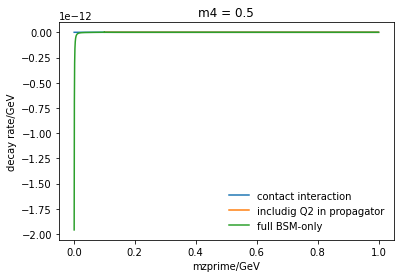

In [95]:
x=np.logspace(-3,0,1000)
M4 = 0.1
plt.plot(x, gamma_heavy_contact(M4, x, Valpha4_alphaepsilon2),label='contact interaction')
plt.plot(x, gamma_heavy(M4, x, Valpha4_alphaepsilon2),label='includig Q2 in propagator')
plt.plot(x, gamma_general(M4, x, Valpha4_alphaepsilon2, Valpha4_alphaepsilon2*x/3.0),label='full BSM-only')
plt.xlabel('mzprime/GeV')
plt.ylabel('decay rate/GeV')
# plt.yscale('log')
# plt.xscale('log')
plt.title(f'm4 = {BSMparams.m4}')
plt.legend(frameon=False)